## Machine learning with scikit-learn

####  Binary classification
In the video, you saw that there are two types of supervised learning — classification and regression. Recall that binary classification is used to predict a target variable that has only two labels, typically represented numerically with a zero or a one.

A dataset, churn_df, has been preloaded for you in the console.

Your task is to examine the data and choose which column could be the target variable for binary classification.

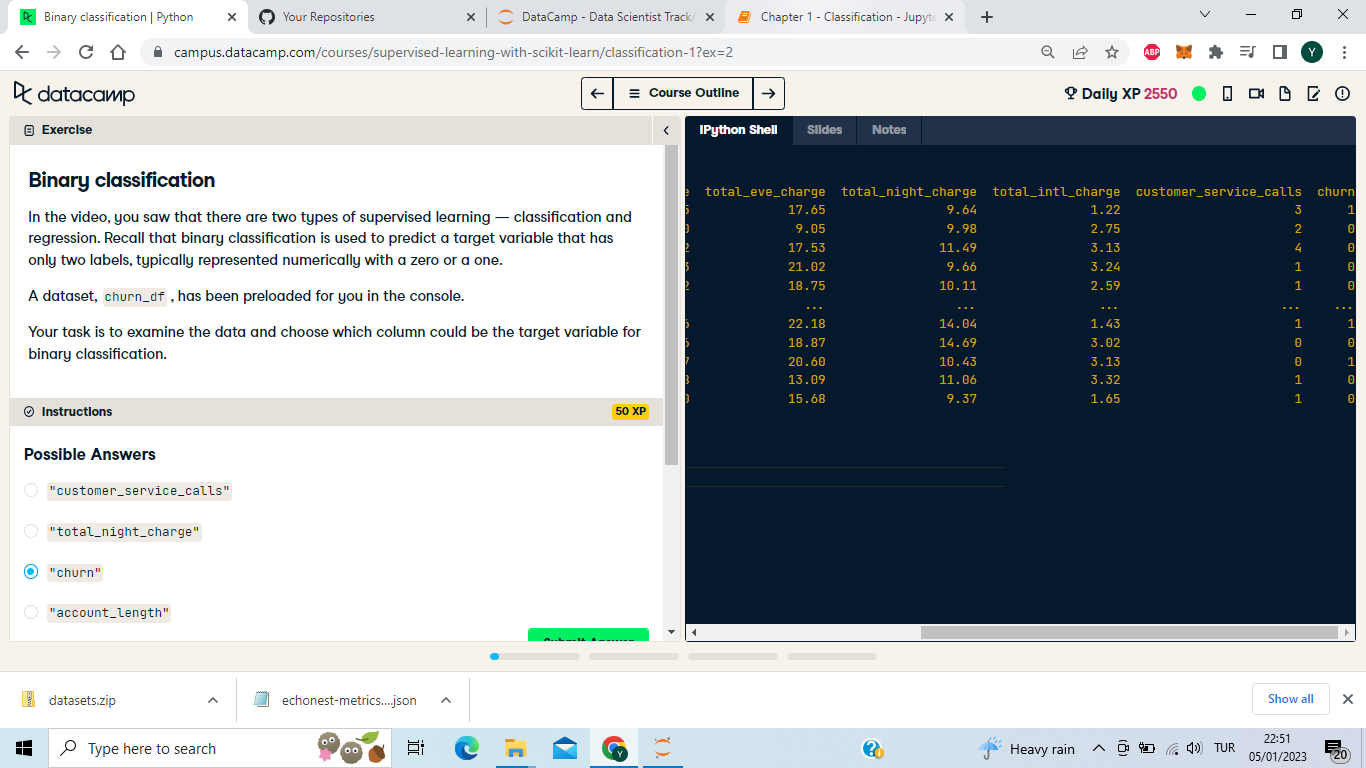

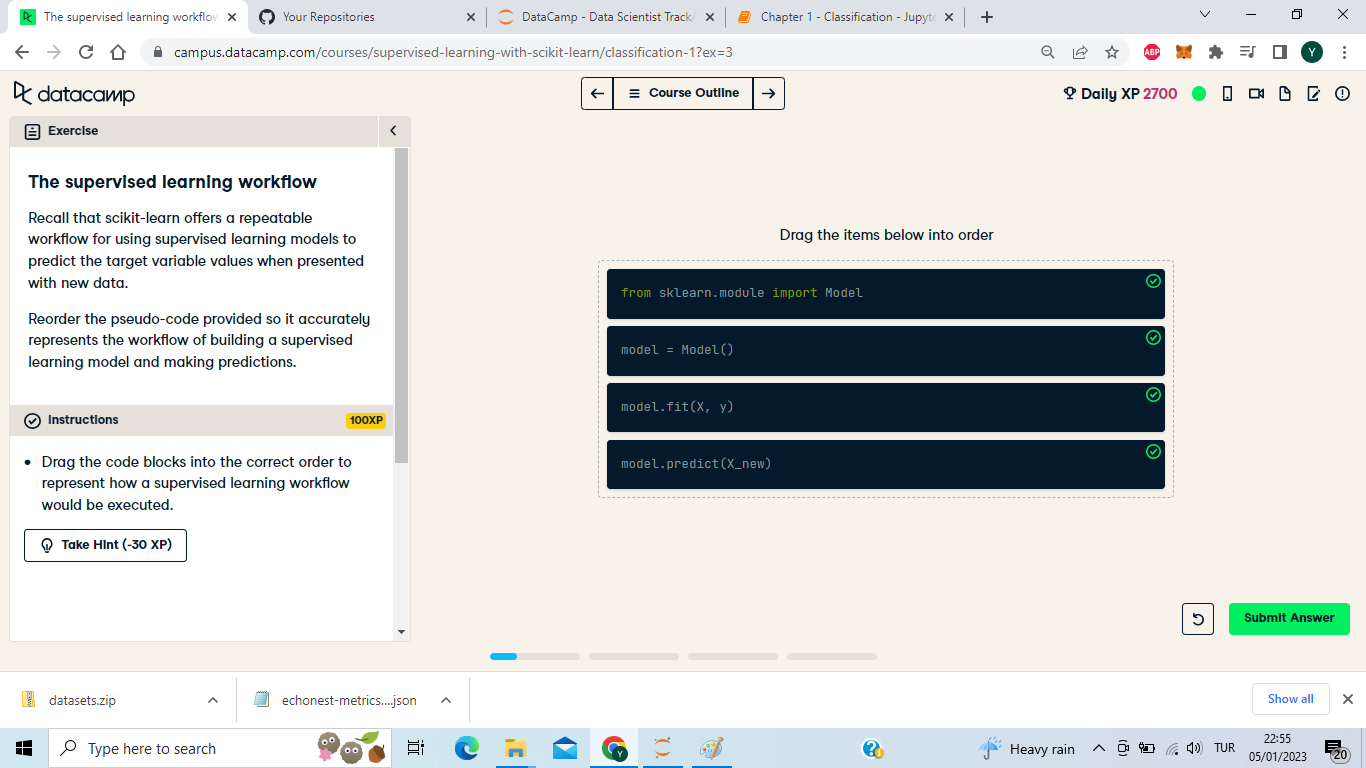

#### k-Nearest Neighbors: Fit
In this exercise, you will build your first classification model using the churn_df dataset, which has been preloaded for the remainder of the chapter.

The features to use will be "account_length" and "customer_service_calls". The target, "churn", needs to be a single column with the same number of observations as the feature data.

You will convert the features and the target variable into NumPy arrays, create an instance of a KNN classifier, and then fit it to the data.

numpy has also been preloaded for you as np.

In [9]:

# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier 
import pandas as pd

churn_df = pd.read_csv("churn_df.csv")

# Create arrays for the features and the target variable
y = churn_df["churn"].values #the attribute '.values' makes Numpy array
X = churn_df[["account_length", "customer_service_calls"]].values #the attribute '.values' makes Numpy array 

# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(6)

# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

Excellent! Now that your KNN classifier has been fit to the data, it can be used to predict the labels of new data points.

#### k-Nearest Neighbors: Predict
Now you have fit a KNN classifier, you can use it to predict the label of new data points. All available data was used for training, however, fortunately, there are new observations available. These have been preloaded for you as X_new.

The model knn, which you created and fit the data in the last exercise, has been preloaded for you. You will use your classifier to predict the labels of a set of new data points:

X_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])

In [18]:
import numpy as np

X_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])

# Predict the labels for the X_new
y_pred = knn.predict(X_new)

# Print the predictions for X_new and Xnew_2
print("Predictions: {}".format(y_pred))

Predictions: [0 1 0]


Great work! The model has predicted the first and third customers will not churn in the new array. But how do we know how accurate these predictions are? Let's explore how to measure a model's performance in the next video.

#### Train/test split + computing accuracy
Now that you have learned about the importance of splitting your data into training and test sets, it's time to practice doing this on the churn_df dataset!

NumPy arrays have been created for you containing the features as X and the target variable as y. You will split them into training and test sets, fit a KNN classifier to the training data, and then compute its accuracy on the test data using the .score() method.

In [3]:
# Import the module
from sklearn.model_selection import train_test_split

X = churn_df.drop("churn", axis=1).values #numpy array due to ".values"
y = churn_df["churn"].values #numpy array due to ".values"

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.8545727136431784


Excellent! In a few lines of code you split a dataset, fit a KNN model, and found its accuracy to be 87%!

#### Overfitting and underfitting
Interpreting model complexity is a great way to evaluate performance when utilizing supervised learning. Your aim is to produce a model that can interpret the relationship between features and the target variable, as well as generalize well when exposed to new observations.

You will generate accuracy scores for the training and test sets using a KNN classifier with different n_neighbor values, which you will plot in the next exercise.

The training and test sets have been created from the churn_df dataset and preloaded as X_train, X_test, y_train, and y_test.

In addition, KNeighborsClassifier has been imported for you along with numpy as np.

In [4]:
# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  
	# Set up a KNN Classifier
	knn = KNeighborsClassifier(neighbor)
  
	# Fit the model
	knn.fit(X_train, y_train)
  
	# Compute accuracy
	train_accuracies[neighbor] = knn.score(X_train, y_train)
	test_accuracies[neighbor] = knn.score(X_test, y_test)
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 1.0, 2: 0.8885971492873218, 3: 0.8994748687171793, 4: 0.8750937734433608, 5: 0.878469617404351, 6: 0.8660915228807202, 7: 0.8705926481620405, 8: 0.8615903975993998, 9: 0.86384096024006, 10: 0.858589647411853, 11: 0.8604651162790697, 12: 0.8574643660915229} 
 {1: 0.7856071964017991, 2: 0.8470764617691154, 3: 0.8320839580209896, 4: 0.856071964017991, 5: 0.8545727136431784, 6: 0.8590704647676162, 7: 0.8605697151424287, 8: 0.8620689655172413, 9: 0.863568215892054, 10: 0.8605697151424287, 11: 0.8605697151424287, 12: 0.8605697151424287}


Notice how training accuracy decreases as the number of neighbors initially gets larger, and vice versa for the testing accuracy? These scores would be much easier to interpret in a line plot, so let's produce a model complexity curve of these results.

#### Visualizing model complexity
Now you have calculated the accuracy of the KNN model on the training and test sets using various values of n_neighbors, you can create a model complexity curve to visualize how performance changes as the model becomes less complex!

The variables neighbors, train_accuracies, and test_accuracies, which you generated in the previous exercise, have all been preloaded for you. You will plot the results to aid in finding the optimal number of neighbors for your model.

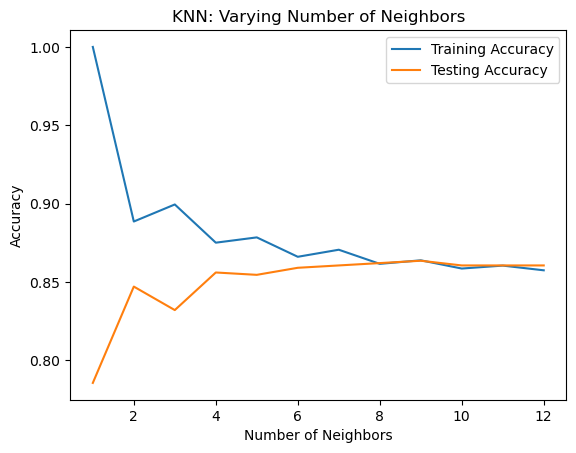

In [5]:
import matplotlib.pyplot as plt

# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

Great work! See how training accuracy decreases and test accuracy increases as the number of neighbors gets larger. For the test set, accuracy peaks with 7 neighbors, suggesting it is the optimal value for our model. Now let's explore regression models!